I used three data sources for this project.  One I retrieved as an API, one as a csv, and one as a webscraping, via JSON. The Movie Database API (TMDb) https://www.kaggle.com/tmdb/tmdb-movie-metadata contains metadata on approximately 5,000 movies.  Variables included are data on the title, plot, cast, crew, budget, revenues, overview, popularity, production company/country, release date, language spoken, status, tagline, and vote average.  https://www.figure-eight.com/data-for-everyone/ is a csv file that contains information on the winners of Academy Awards.  “Academy Awards Demographics.”   There are 441 rows of data.  There are 28 columns, but several may not be helpful.  Data includes best actor, best actress, best supporting actor, best supporting actress, best director, movie title, race/ethnicity, religion, birthplace, and sexual orientation.  The website I scraped is http://www.moviebodycounts.com/, which tallies the actual, visible “on screen kills/deaths/bodies” of movies.  It has an index of on screen kill/deaths for individual actors and their films.  Other information includes, director, MPAA rating, genre, subjects, and body count breakdowns.  
After cleaning and performing transforming exercises on each of the databases, I converted them to csv files, then created a SQLite database and imported each as a table within it.  The relationship among the three tables is movie title.  I merged the three files into dataframes as I pulled them into a Jupyter Notebook using Python.  From there I performed various data visualizations as required for term project completion. 

It turns out that not so many high body count movies have won Academy Awards (or Oscars) over the years, and the users who populate the TMDb have a bias toward more recent films.  Personal field work was attempted by me and my family.  Unfortunately our attention spans became too focussed on the action of the movies and we eventually forgot to keep talling mortalities - generally within the first 10-15 minutes. So I had to make up data.  Certainly not 100s of rows, but let's just saw that numerous members of the royal family have unexpectedly received after-the-fact Oscars for Best Director in movies with previously unknown astronomical body counts.  Any variation of the spelling of John Doe and Jane Roe is also likely a fabricated entry.  

In [1]:
# from p. 319 in 'Wrangling' text
import sqlite3
import pandas as pd
pd.set_option('display.max_rows',1500)            # the most possible rows if all three DataFrames were stacked

## join popular and award tables

In [2]:
columns = ['Film', 'release_date','vote_average','Film','Oscarcategory','Name','Yearofaward']
data = []

with sqlite3.connect("new SQLite database, try merging.db") as conn:
    cursor = conn.cursor()
    cursor.execute("PRAGMA foreign_keys = 1")

In [5]:
sql = '''
    SELECT p.Film, p.release_date, p.vote_average, 
    a.Film, a.Oscarcategory, a.Name, a.Yearofaward
    FROM popularity_baked as p
    JOIN awards_fakes_added as a ON p.Film = a.Film
    '''

In [6]:
# Use the execute() method of cursor to execute the sql command
rows = cursor.execute(sql)

In [7]:
# Append the rows to the data list
for row in rows:
    data.append(row)

In [8]:
# Create a DataFrame using the data list
df = pd.DataFrame(data, columns = columns)
df                                               # Returns 22 rows.

,Film,release_date,vote_average,Film,Oscarcategory,Name,Yearofaward
0,The Godfather,3/14/1972,8.7,The Godfather,Best Actor,Marlon Brando,1973
1,Schindler's List,11/30/1993,8.6,Schindler's List,Best Director,Steven Spielberg,1994
2,Forrest Gump,7/6/1994,8.4,Forrest Gump,Best Actor,Tom Hanks,1995
3,The Dark Knight,7/16/2008,8.4,The Dark Knight,Best Supporting Actor,Heath Ledger,2009
4,Inglourious Basterds,8/18/2009,8.2,Inglourious Basterds,Best Supporting Actor,Christoph Waltz,2010
5,Gladiator,5/1/2000,8.2,Gladiator,Best Actor,Russell Crowe,2001
6,Saving Private Ryan,7/24/1998,8.1,Saving Private Ryan,Best Director,Steven Spielberg,1999
7,Kill Bill: Vol. 1,10/10/2003,8.0,Kill Bill: Vol. 1,Best Director,None,2003
8,American Beauty,9/15/1999,8.0,American Beauty,Best Actor,Kevin Spacey,2000
9,No Country for Old Men,11/8/2007,7.9,No Country for Old Men,Best Supporting Actor,Javier Bardem,2008


I validated this join with a left join on these two tables, retrieving 377 rows, with only 11 of them having a movie in the 'Movietitle' column.  This is due to Oscars only awarded once per year.  A movie has multiple opportunities to make this list due to actors and director all being categories.  In the case of movies that won multiple Oscars, I only retained one row, with first priority given to Best Actor, then Best Actress, then Best Supporting Actor, Best Supporting Actress, and Best Director last.

## Now try it with 2 other tables; popular and body

In [9]:
columns1 = ['Film', 'release_date','vote_average','Film','Body_Count','Year']
data1 = []

In [10]:
with sqlite3.connect("new SQLite database, try merging.db") as conn:
    cursor1 = conn.cursor()
    cursor1.execute("PRAGMA foreign_keys = 1")

In [13]:
sql1 = '''
    SELECT p.Film, p.release_date, p.vote_average, 
    b.Film, b.Body_Count, b.Year
    FROM popularity_baked as p
    JOIN bodies_faked as b ON p.Film = b.Film
    WHERE p.Film = b.Film
    '''

In [14]:
# Use the execute() method of cursor to execute the sql command
rows1 = cursor1.execute(sql1)

In [15]:
# Append the rows to the data list
for row in rows1:
    data1.append(row)

In [16]:
# Create a DataFrame using the data list
df1 = pd.DataFrame(data1, columns = columns1)
df1                                                      # Returns 13 rows

,Film,release_date,vote_average,Film,Body_Count,Year
0,Titanic,11/18/1997,7.8,Titanic,307,1997
1,Saving Private Ryan,7/24/1998,8.1,Saving Private Ryan,255,1998
2,Braveheart,5/24/1995,7.9,Braveheart,184,1995
3,Kill Bill: Vol. 1,10/10/2003,8.0,Kill Bill: Vol. 1,95,2003
4,Pirates of the Caribbean: Dead Man's Chest,6/20/2006,7.2,Pirates of the Caribbean: Dead Man's Chest,90,2006
5,Raiders of the Lost Ark,6/12/1981,7.9,Raiders of the Lost Ark,84,1981
6,The Fifth Element,5/2/1997,7.5,The Fifth Element,80,1997
7,Gladiator,5/1/2000,8.2,Gladiator,77,2000
8,The Expendables,8/3/2010,6.1,The Expendables,45,2010
9,Battleship,4/11/2012,5.7,Battleship,7,2012


## Reverse it.  Start with body table and merge popular

In [17]:
columns2 = ['Film', 'release_date','vote_average','Film','Body_Count','Year']
data2 = []

In [18]:
with sqlite3.connect("new SQLite database, try merging.db") as conn:
    cursor2 = conn.cursor()
    cursor2.execute("PRAGMA foreign_keys = 1")

In [19]:
sql2 = '''
    SELECT p.Film, p.release_date, p.vote_average, 
    b.Film, b.Body_Count, b.Year
    FROM popularity_baked as p
    JOIN bodies_faked as b ON p.Film = b.Film
    '''

In [20]:
# Use the execute() method of cursor to execute the sql command
rows2 = cursor2.execute(sql2)

In [21]:
# Append the rows to the data list
for row in rows2:
    data2.append(row)

In [22]:
# Create a DataFrame using the data list
df2 = pd.DataFrame(data2, columns = columns2)
df2                                           # Returns 13 rows.

,Film,release_date,vote_average,Film,Body_Count,Year
0,Titanic,11/18/1997,7.8,Titanic,307,1997
1,Saving Private Ryan,7/24/1998,8.1,Saving Private Ryan,255,1998
2,Braveheart,5/24/1995,7.9,Braveheart,184,1995
3,Kill Bill: Vol. 1,10/10/2003,8.0,Kill Bill: Vol. 1,95,2003
4,Pirates of the Caribbean: Dead Man's Chest,6/20/2006,7.2,Pirates of the Caribbean: Dead Man's Chest,90,2006
5,Raiders of the Lost Ark,6/12/1981,7.9,Raiders of the Lost Ark,84,1981
6,The Fifth Element,5/2/1997,7.5,The Fifth Element,80,1997
7,Gladiator,5/1/2000,8.2,Gladiator,77,2000
8,The Expendables,8/3/2010,6.1,The Expendables,45,2010
9,Battleship,4/11/2012,5.7,Battleship,7,2012


## Try it with award table and popular table - oops!  This is the same as the top query.  So let's play around with it a little and see if I can get an OUTER join out of it or something else that retrieves more results.

In [23]:
columns3 = ['Film', 'release_date','vote_average','Film','Oscarcategory','Name','Yearofaward']
data3 = []

In [24]:
with sqlite3.connect("new SQLite database, try merging.db") as conn:
    cursor3 = conn.cursor()
    cursor3.execute("PRAGMA foreign_keys = 1")

In [25]:
sql3 = '''
    SELECT p.Film, p.release_date, p.vote_average, 
    a.Film, a.Oscarcategory, a.Name, a.Yearofaward
    FROM popularity_baked as p
    LEFT JOIN awards_fakes_added as a ON p.Film = a.Film
    '''

In [26]:
# Use the execute() method of cursor to execute the sql command
rows3 = cursor3.execute(sql3)

In [27]:
for row in rows3:
    data3.append(row)

In [28]:
df3 = pd.DataFrame(data3, columns = columns3)
df3                         # Returns 376 rows

,Film,release_date,vote_average,Film,Oscarcategory,Name,Yearofaward
0,The Insurrection,5/4/2020,9.0,None,None,None,NaN
1,The Shawshank Redemption,9/23/1994,8.7,None,None,None,NaN
2,The Godfather,3/14/1972,8.7,The Godfather,Best Actor,Marlon Brando,1973.0
3,The Godfather: Part II,12/20/1974,8.6,None,None,None,NaN
4,Schindler's List,11/30/1993,8.6,Schindler's List,Best Director,Steven Spielberg,1994.0
5,The Green Mile,12/10/1999,8.5,None,None,None,NaN
6,Pulp Fiction,9/10/1994,8.5,None,None,None,NaN
7,Justice League Dark: Apokolips War,5/5/2020,8.5,None,None,None,NaN
8,Spider-Man: Into the Spider-Verse,12/6/2018,8.4,None,None,None,NaN
9,The Lord of the Rings: The Return of the King,12/1/2003,8.4,None,None,None,NaN


## Try emulating a full outer join in SQLite using LEFT JOIN and UNION

In [31]:
# from https://www.sqlitetutorial.net/sqlite-full-outer-join/   - Emulating SQLite full outer join
columns4 = ['Film', 'release_date','vote_average','Film','Oscarcategory','Name','Yearofaward']
data4 = []

In [32]:
with sqlite3.connect("new SQLite database, try merging.db") as conn:
    cursor4 = conn.cursor()
    cursor4.execute("PRAGMA foreign_keys = 1")

In [33]:
sql4 = '''
    SELECT 
        p.Film, 
        p.release_date, 
        p.vote_average, 
        a.Film, 
        a.Oscarcategory, 
        a.Name, 
        a.Yearofaward
    FROM popularity_baked as p
    LEFT JOIN awards_fakes_added as a USING(Film)
    UNION ALL
    SELECT 
        p.Film, 
        p.release_date, 
        p.vote_average, 
        a.Film, 
        a.Oscarcategory, 
        a.Name, 
        a.Yearofaward
    FROM awards_fakes_added as a
    LEFT JOIN popularity_baked as p USING(Film)
    WHERE p.Film IS NULL;
    '''

In [34]:
# Use the execute() method of cursor to execute the sql command
rows4 = cursor4.execute(sql4)

In [35]:
for row in rows4:
    data4.append(row)

In [36]:
df4 = pd.DataFrame(data4, columns = columns4)
df4                            # Returns 712 rows.  Everything from both tables, overlapping on Film when it is in both tables.

,Film,release_date,vote_average,Film,Oscarcategory,Name,Yearofaward
0,The Insurrection,5/4/2020,9.0,None,None,None,NaN
1,The Shawshank Redemption,9/23/1994,8.7,None,None,None,NaN
2,The Godfather,3/14/1972,8.7,The Godfather,Best Actor,Marlon Brando,1973.0
3,The Godfather: Part II,12/20/1974,8.6,None,None,None,NaN
4,Schindler's List,11/30/1993,8.6,Schindler's List,Best Director,Steven Spielberg,1994.0
5,The Green Mile,12/10/1999,8.5,None,None,None,NaN
6,Pulp Fiction,9/10/1994,8.5,None,None,None,NaN
7,Justice League Dark: Apokolips War,5/5/2020,8.5,None,None,None,NaN
8,Spider-Man: Into the Spider-Verse,12/6/2018,8.4,None,None,None,NaN
9,The Lord of the Rings: The Return of the King,12/1/2003,8.4,None,None,None,NaN


In [37]:
conn.commit()                      # Supposed to commit/save this, but I don't think this did anything.

# Finally! Merging all three tables at once
from https://javarevisited.blogspot.com/2012/11/how-to-join-three-tables-in-sql-query-mysql-sqlserver.html


In [52]:
# from https://javarevisited.blogspot.com/2012/11/how-to-join-three-tables-in-sql-query-mysql-sqlserver.html
columns5 = ['Film', 'release_date','vote_average','Film','Oscarcategory','Name','Yearofaward','Film','Body_Count','Year']
data5 = []

In [53]:
with sqlite3.connect("new SQLite database, try merging.db") as conn:
    cursor5 = conn.cursor()
    cursor5.execute("PRAGMA foreign_keys = 1")

In [54]:
sql5 = '''
SELECT 
    p.Film, 
    p.release_date, 
    p.vote_average, 
    a.Film, 
    a.Oscarcategory, 
    a.Name, 
    a.Yearofaward,
    b.Film, 
    b.Body_Count, 
    b.Year
FROM popularity_baked as p join awards_fakes_added as a ON p.Film = a.Film
                                  join bodies_faked as b ON a.Film = b.Film
                                  '''

In [55]:
rows5 = cursor5.execute(sql5)

In [56]:
for row in rows5:
    data5.append(row)

In [57]:
df5 = pd.DataFrame(data5, columns = columns5)
df5  

,Film,release_date,vote_average,Film,Oscarcategory,Name,Yearofaward,Film,Body_Count,Year
0,Braveheart,5/24/1995,7.9,Braveheart,Best Director,Mel Gibson,1996,Braveheart,184,1995
1,Gladiator,5/1/2000,8.2,Gladiator,Best Actor,Russell Crowe,2001,Gladiator,77,2000
2,Saving Private Ryan,7/24/1998,8.1,Saving Private Ryan,Best Director,Steven Spielberg,1999,Saving Private Ryan,255,1998
3,Titanic,11/18/1997,7.8,Titanic,Best Director,James Cameron,1998,Titanic,307,1997
4,The Fifth Element,5/2/1997,7.5,The Fifth Element,Best Director,None,1997,The Fifth Element,80,1997
5,Kill Bill: Vol. 1,10/10/2003,8.0,Kill Bill: Vol. 1,Best Director,None,2003,Kill Bill: Vol. 1,95,2003
6,Clash of the Titans,4/1/2010,5.8,Clash of the Titans,Best Director,None,2010,Clash of the Titans,50,2010
7,Battleship,4/11/2012,5.7,Battleship,Best Director,None,2012,Battleship,7,2012
8,The Expendables,8/3/2010,6.1,The Expendables,Best Director,None,2010,The Expendables,45,2010
9,Ghost in the Shell,3/29/2017,6.0,Ghost in the Shell,Best Director,None,2017,Ghost in the Shell,19,2017


# Scatter plot from two sources
Body_Count is from http://www.moviebodycounts.com/.  vote_average is from The Movie Database (TMDb).

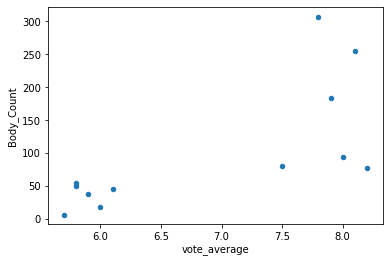

In [69]:
from pandas import DataFrame
import matplotlib.pyplot as plt

Data = {'vote_average': (df5.vote_average),                      # Make the column into a Series to insert the values for x.
       'Body_Count': (df5.Body_Count)}                           # Same with y.

df_4_scatter = pd.DataFrame(Data,columns=['vote_average','Body_Count'])    # Put the 2 Series back into a new DataFrame

df_4_scatter.plot(x='vote_average', y='Body_Count', kind = 'scatter')

plt.show()

# Would you look at that?  People like movies with higher body counts better!

I completed the four other required visualizations for this project using data imported into Power BI from the DB Browser SQLite database (that I connected to in order to pull this data into Jupyter Notebook for Python wrangling).  They are saved as a pdf as requested.